In [2]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [3]:
print('insightface', insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 2.0.2


# 1. Detectando as faces

In [4]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

y:\Github2\face-change\face_venv\lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\wilso/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

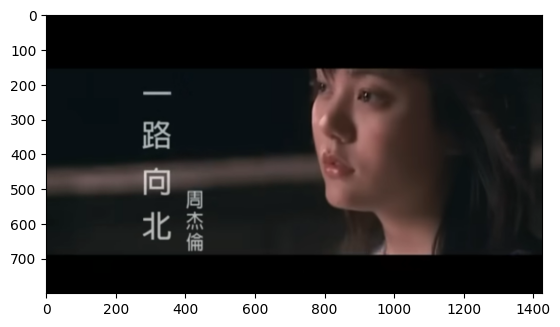

In [5]:
img = cv2.imread('mogi.png')
plt.imshow(img[:,:,::-1])
plt.show()

In [16]:
faces = app.get(img)
face_org = faces[0]

In [7]:
len(faces)

1

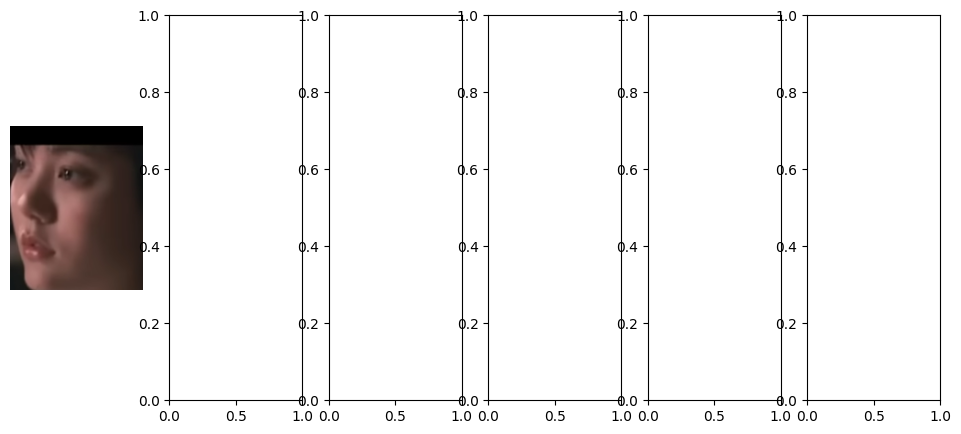

In [8]:
fig, axs = plt.subplots(1, 6, figsize=(12, 5))
for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

# 2. Face Swapping

In [9]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx',
                                          download=False,
                                          download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


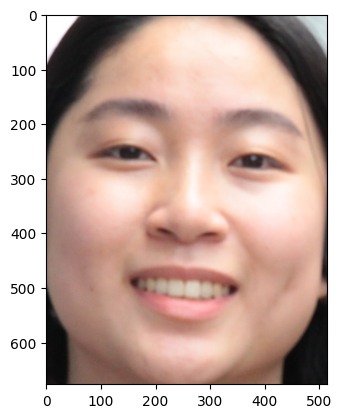

In [10]:
img_swap = cv2.imread('eehhh.jpg')
source_faces = app.get(img_swap)
source_face = source_faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img_swap[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

uno = face_org.embedding
dos = source_face.embedding
cosine_similarity(uno, dos)

np.float32(1.0)

In [15]:
source_face.embedding

array([ 3.40954185e-01, -2.23881871e-01, -1.18629813e+00, -1.00798965e+00,
        6.34894595e-02, -1.25558484e+00,  8.53334248e-01, -5.67079782e-01,
       -7.16864765e-01,  1.06937659e+00, -7.67125130e-01,  7.55086243e-02,
        5.11686921e-01, -5.85483134e-01, -2.95800865e-01,  4.35725212e-01,
       -6.19385779e-01,  9.12684679e-01,  6.10688627e-01,  4.90247905e-01,
        6.84451520e-01,  8.27217877e-01, -1.00079668e+00, -2.05900526e+00,
        1.28254080e+00, -2.35725895e-01,  1.67097583e-01,  2.53097899e-02,
       -7.14573979e-01, -3.80959004e-01, -1.02349055e+00, -1.23343611e+00,
       -5.95641024e-02,  1.05080998e+00,  4.15743828e-01,  2.31927469e-01,
        2.41388845e+00, -9.03588295e-01,  7.19818592e-01, -5.22064328e-01,
       -3.87592673e-01,  9.09184813e-01, -9.26370502e-01, -2.19746143e-01,
        8.45122099e-01, -1.65423179e+00, -6.35012507e-01, -1.10940230e+00,
       -1.23733687e+00, -5.51534951e-01,  2.29257196e-01,  3.44586253e-01,
        7.19709992e-01,  

In [11]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

# Plot the Swapped Faces

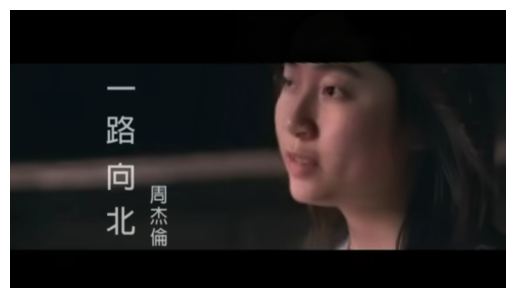

In [12]:
plt.figure(frameon=False)
plt.imshow(res[:, :, ::-1])
plt.axis('off')

plt.savefig('result2.png',
            bbox_inches='tight',
            pad_inches=0)
plt.show()
plt.close()